
## **Machine Learning: Predicting Employee Attrition**

Yuejia Huang (github.com/yhuang084)


**The goals** of this project 
* investigate the factors that lead to healthcare employee attrition
* build a machine learning model to predict where an employee will attrite or not.

**Key findings:**

* One of every ten employees attrite.

* Whether work overtime, number of years since last promotion, marital status are some of the major factors that lead to employee attrition.

* The business need is to correctly predict those are about to attrite and provide intervention to stop the loss of talented. We also want to keep the prediction error low. That is, the number of wrongly predicting those would stay are actually leaving should be low. Thus, the metric should be focused on is *false negative* (the left bottom side of the confusion matrix).
The key performance metric will then be *recall*, which calculates the number of true positives divided by the sum of true positives and false negative. The higher false negative number, the lower recall. 

* We build and test four machine learning models: logistic, K-NN, Linear discriminant analysis and quadratic discriminant analysis. The champion model is the logistic model with a recall score of 0.78.

_Data source:_ https://www.kaggle.com/datasets/jpmiller/employee-attrition-for-healthcare/data

**Import packages and dataset**

In [93]:
#operational
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

#visualzation
import matplotlib.pyplot as plt
import seaborn as sns

#data preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#machine learning algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

#model evaluation
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve

#hyperparameter tuning
from sklearn.model_selection import GridSearchCV


**Exploratory data analysis**

In [94]:
df = pd.read_csv('watson_healthcare_modified.csv')

In [95]:
#to display all columns
pd.set_option('display.max_columns', None)

In [96]:
df.head()

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1313919,41,No,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,1,2,Female,94,3,2,Nurse,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,1200302,49,No,Travel_Frequently,279,Maternity,8,1,Life Sciences,1,3,Male,61,2,2,Other,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,1060315,37,Yes,Travel_Rarely,1373,Maternity,2,2,Other,1,4,Male,92,2,1,Nurse,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,1272912,33,No,Travel_Frequently,1392,Maternity,3,4,Life Sciences,1,4,Female,56,3,1,Other,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,1414939,27,No,Travel_Rarely,591,Maternity,2,1,Medical,1,1,Male,40,3,1,Nurse,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [97]:
df.tail()

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1671,1117656,26,Yes,Travel_Rarely,471,Neurology,24,3,Technical Degree,1,3,Male,66,1,1,Nurse,4,Single,2340,23213,1,Y,Yes,18,3,2,80,0,1,3,1,1,0,0,0
1672,1152327,46,No,Travel_Rarely,1125,Cardiology,10,3,Marketing,1,3,Female,94,2,3,Nurse,4,Married,9071,11563,2,Y,Yes,19,3,3,80,1,15,3,3,3,2,1,2
1673,1812428,20,No,Travel_Rarely,959,Maternity,1,3,Life Sciences,1,4,Female,83,2,1,Other,2,Single,2836,11757,1,Y,No,13,3,4,80,0,1,0,4,1,0,0,0
1674,1812429,39,No,Travel_Rarely,466,Neurology,1,1,Life Sciences,1,4,Female,65,2,4,Therapist,4,Married,12742,7060,1,Y,No,16,3,3,80,1,21,3,3,21,6,11,8
1675,1152329,27,No,Travel_Rarely,511,Cardiology,2,2,Medical,1,1,Female,89,4,2,Nurse,3,Single,6500,26997,0,Y,No,14,3,2,80,0,9,5,2,8,7,0,7


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1676 entries, 0 to 1675
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeeID                1676 non-null   int64 
 1   Age                       1676 non-null   int64 
 2   Attrition                 1676 non-null   object
 3   BusinessTravel            1676 non-null   object
 4   DailyRate                 1676 non-null   int64 
 5   Department                1676 non-null   object
 6   DistanceFromHome          1676 non-null   int64 
 7   Education                 1676 non-null   int64 
 8   EducationField            1676 non-null   object
 9   EmployeeCount             1676 non-null   int64 
 10  EnvironmentSatisfaction   1676 non-null   int64 
 11  Gender                    1676 non-null   object
 12  HourlyRate                1676 non-null   int64 
 13  JobInvolvement            1676 non-null   int64 
 14  JobLevel                

* There are 1676 rows and 35 columns in the dataset. No missing value is found.
* There are two datatypes: numerical and categorical. We will explore them seperately in the following analysis.

In [99]:
df.nunique()

EmployeeID                  1676
Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        5
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
Shift                          4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

* The dataset is employment records of 1676 healthcare employees, identified by an unique employee ID. Same information is recoded in EmployeeCount redudantly. Thus we will drop EmployeeCount.
* All the employees are over 18 year-old and have the same StandardHour (i.e. 80 hours). We will drop those two columns as they don't add value to our analysis.

In [100]:
df.drop(['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeID'], axis = 1, inplace = True)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,No,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,2,Female,94,3,2,Nurse,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Maternity,8,1,Life Sciences,3,Male,61,2,2,Other,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Maternity,2,2,Other,4,Male,92,2,1,Nurse,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Maternity,3,4,Life Sciences,4,Female,56,3,1,Other,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Maternity,2,1,Medical,1,Male,40,3,1,Nurse,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


In [101]:
df['Shift'].value_counts()

Shift
0    708
1    684
2    185
3     99
Name: count, dtype: int64

In [102]:
#numerical columns
num_cols = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 
            'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 
            'PercentSalaryHike', 'Shift', 'TotalWorkingYears', 
            'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 
            'YearsSinceLastPromotion', 'YearsWithCurrManager']
#categorical columns
cat_cols = ['Attrition', 'BusinessTravel', 'Department',
             'Education', 'EducationField', 'EnvironmentSatisfaction', 
             'Gender', 'JobInvolvement', 'JobLevel',
               'JobRole', 'JobSatisfaction', 'MaritalStatus',
                 'OverTime', 'PerformanceRating', 'RelationshipSatisfaction', 'WorkLifeBalance']

**Univariate analysis on numerical variables**

In [103]:
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1676.0,36.866348,9.129126,18.0,30.00,36.0,43.00,60.0
DailyRate,1676.0,800.557876,401.594438,102.0,465.00,796.5,1157.00,1499.0
DistanceFromHome,1676.0,9.221957,8.158118,1.0,2.00,7.0,14.00,29.0
HourlyRate,1676.0,65.470167,20.207572,30.0,48.00,65.5,83.00,100.0
MonthlyIncome,1676.0,6516.512530,4728.456618,1009.0,2928.25,4899.0,8380.25,19999.0
MonthlyRate,1676.0,14287.019690,7138.857783,2094.0,7993.00,14269.5,20462.00,26999.0
NumCompaniesWorked,1676.0,2.662291,2.477704,0.0,1.00,2.0,4.00,9.0
PercentSalaryHike,1676.0,15.196897,3.646550,11.0,12.00,14.0,18.00,25.0
Shift,1676.0,0.806086,0.855527,0.0,0.00,1.0,1.00,3.0
TotalWorkingYears,1676.0,11.338902,7.834996,0.0,6.00,10.0,15.00,40.0


* The average age of employees is about 37 years.
* The average distance from home is about 9 km and half of employees live within 7km. It suggests that the distribution is right-skewed.
* Half of employees work for 2 companies at the same time.
* On average, employees received a 15% increase in their annual salaries.
* There are some employees don't have a work shit at all.
* On average, it takes 2.2 years to get promoted.
* The average employee retention is about 7 years.
* An employee stays in his/her current position for about 4.26 years on average. 

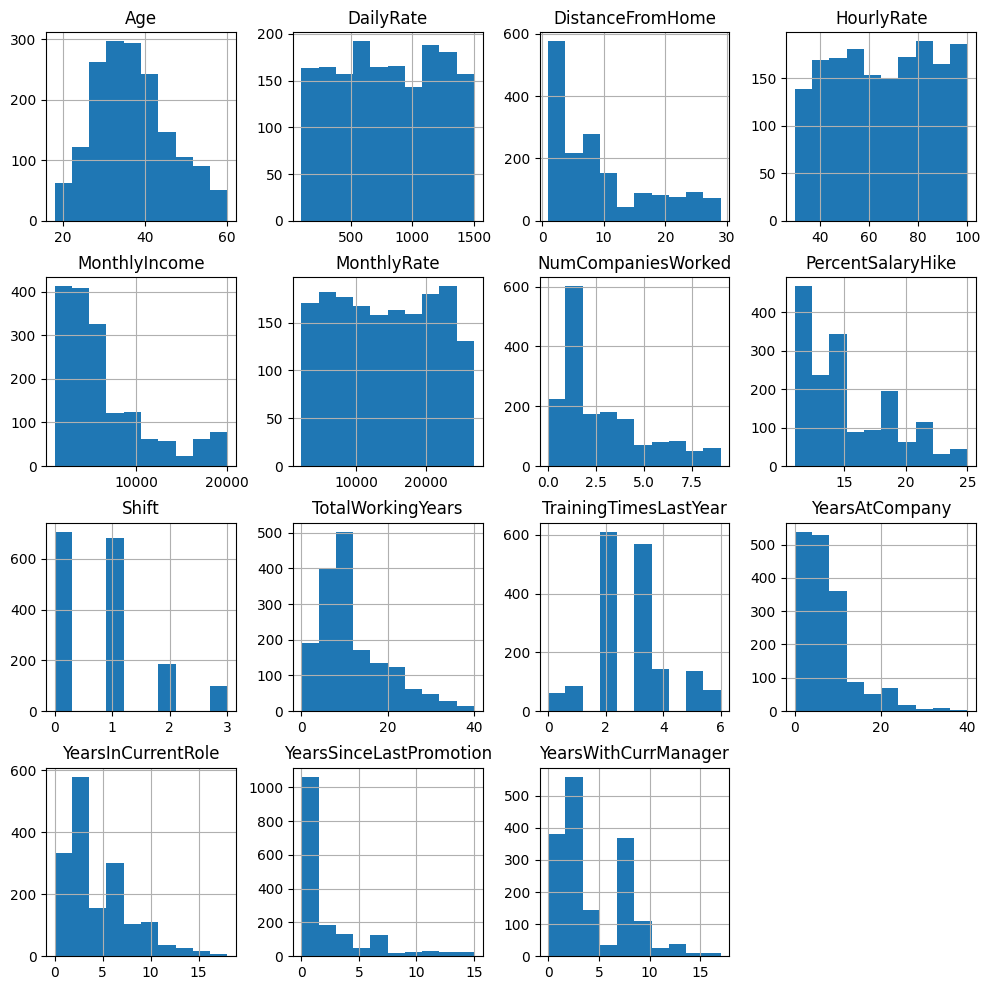

In [104]:
#histograms to check distribution
df[num_cols].hist(figsize = (12,12))

plt.show()

* The scale of variables vary. Standardization is needed to better prepare for model buidling.
* Age is somehow normally distributed: the majority of the employees are between 20 to 40 years-old.
* DistanceFromHome is right-skewed: most of employees lives moderately close to the workplace.
* MonthlyIncome is right-skewed: most of employees are paid less than 10,000 usd monthly.
* It's common to see a salary hike less than 15% last year.
* TotalWorkingYears is quite right-skewed: the majority of the employees has worked less than 20 years.
* YearsAtCompany is quite right-skewed: most of employees stay less than 20 years and very few stay for 4 decades at the current workplace.
* YearsInCurrentRole and YearsWithCurrManager somehow share the same right-skewed distribution: most of employees hold the same position for about 3 years with the same manager.
* DailyRate, HourlyRate and MonthlyRate somehow have a uniform distribution but do not provide much information.

**Univariate analysis on categorical variables**

In [105]:
for i in cat_cols:
    print(str(df[i].value_counts(normalize = True) * 100) + ' %')

    print('-' * 40)

Attrition
No     88.126492
Yes    11.873508
Name: proportion, dtype: float64 %
----------------------------------------
BusinessTravel
Travel_Rarely        70.644391
Travel_Frequently    19.093079
Non-Travel           10.262530
Name: proportion, dtype: float64 %
----------------------------------------
Department
Maternity     47.494033
Cardiology    31.682578
Neurology     20.823389
Name: proportion, dtype: float64 %
----------------------------------------
Education
3    39.081146
4    26.670644
2    19.212411
1    11.694511
5     3.341289
Name: proportion, dtype: float64 %
----------------------------------------
EducationField
Life Sciences       41.587112
Medical             31.264916
Marketing           11.276850
Technical Degree     8.890215
Other                5.250597
Human Resources      1.730310
Name: proportion, dtype: float64 %
----------------------------------------
EnvironmentSatisfaction
3    30.548926
4    30.310263
1    19.689737
2    19.451074
Name: proportion, dty

* About 11% of employees left.
* 70% of employees don't really travel for work.
* There are 3 departments: About half of employees work in maternity department, followed by cardiology and neurology.
* The majority of employees obtained a Bachelor's degree and above
* The education backgrounds are diverse but most of employees come from a life science and medical-related background.
* About 70% of employees are quite satisfied with working environment.
* There are 6 males and 4 females in every 10 employees.
* The majority of employees have a job level of 1 to 3.
* Half of the employees are nurses.
* About half of the employees are married.
* Only about 30% of employees have worked overtime.
* 60% of employees agreed the work and life are well-balanced.

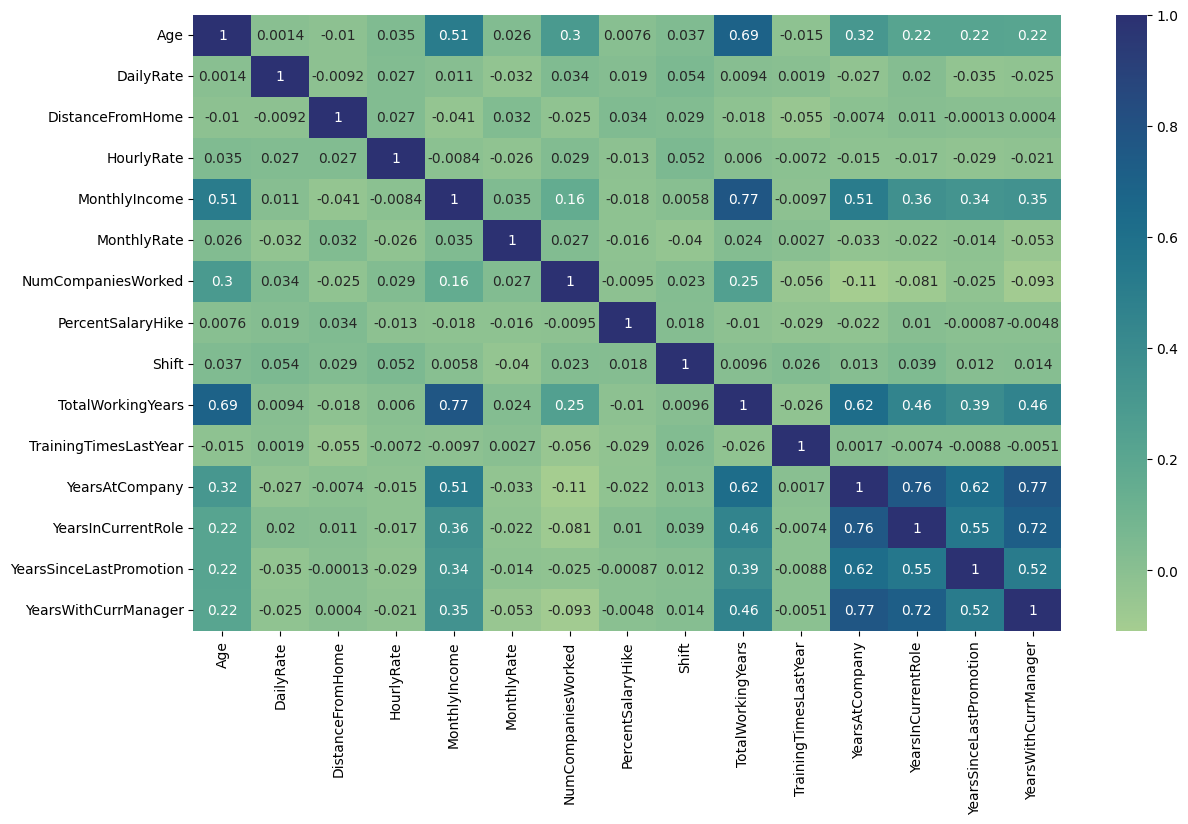

In [106]:
plt.figure(figsize = (14,8))
sns.heatmap(df[num_cols].corr(), annot = True, cmap = 'crest')

plt.show()

* Age is correlated with monthly income, number of companies worked previously, total working years and years at the current company. 
* Years at the current company, years in the current role,  years with the current manager and years since last promotion are highly correlated with each other. 

**Target variable v.s. independent variables**

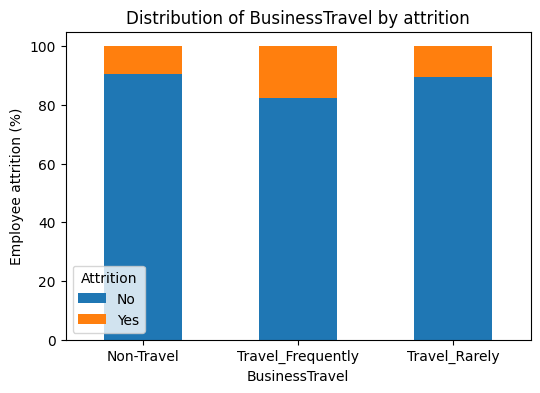

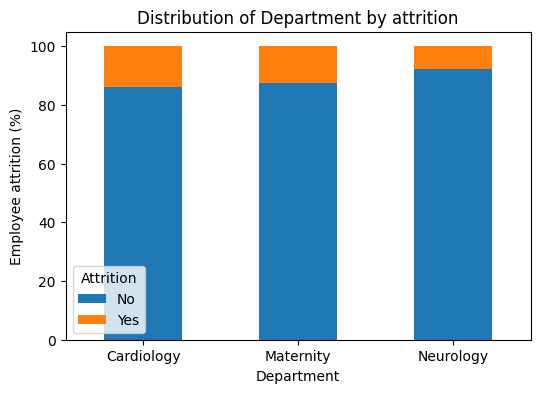

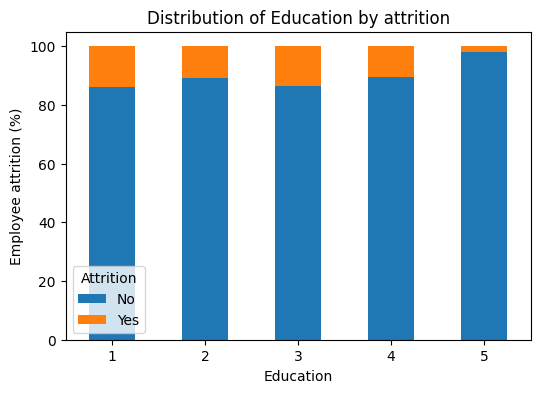

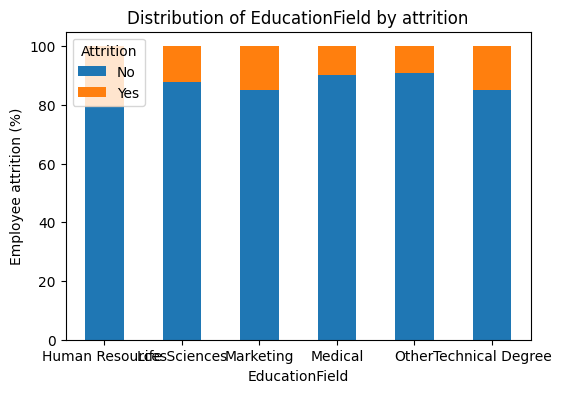

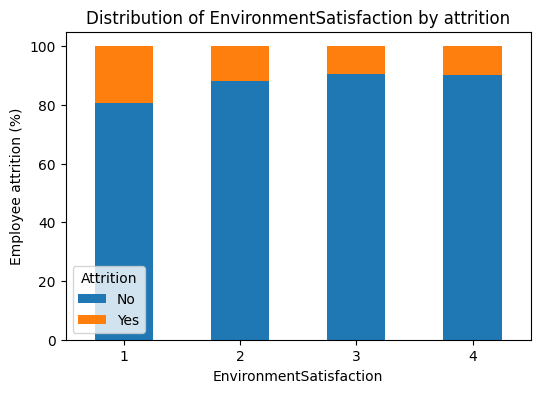

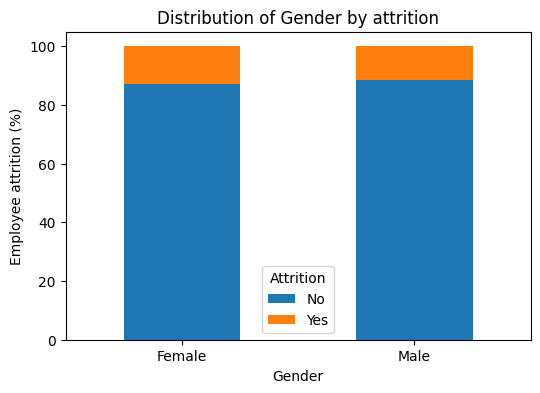

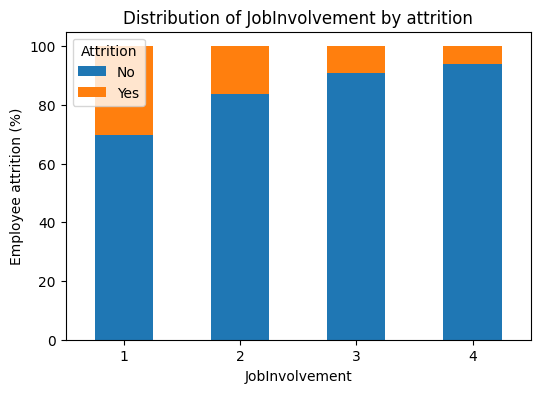

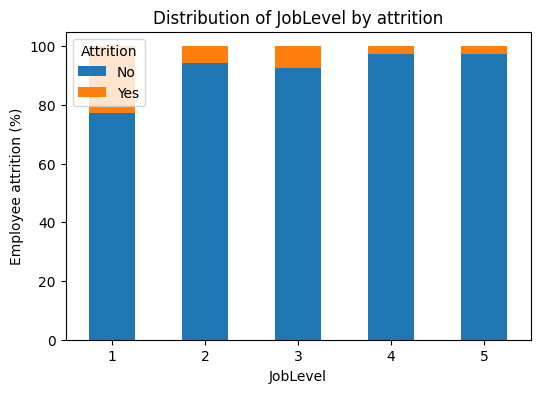

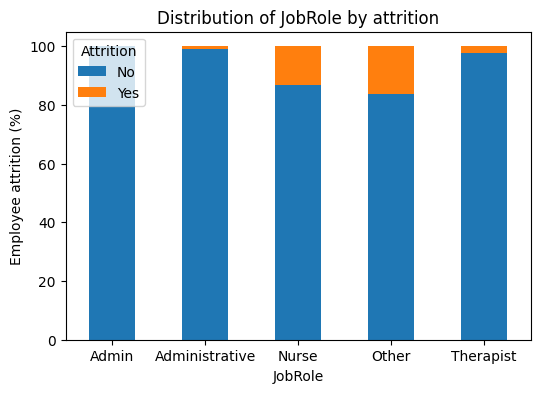

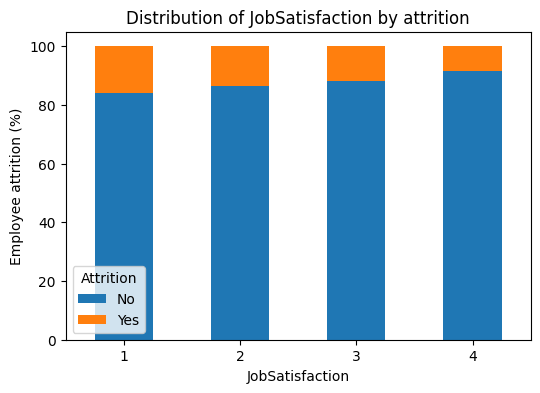

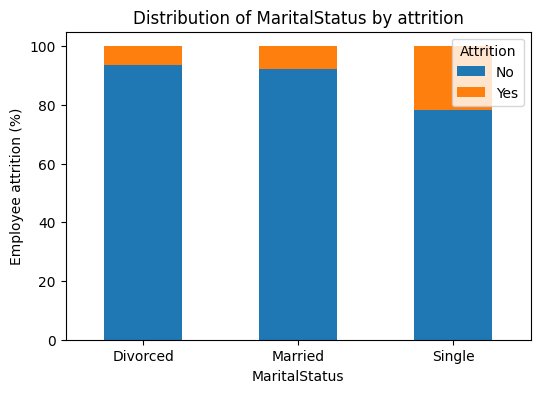

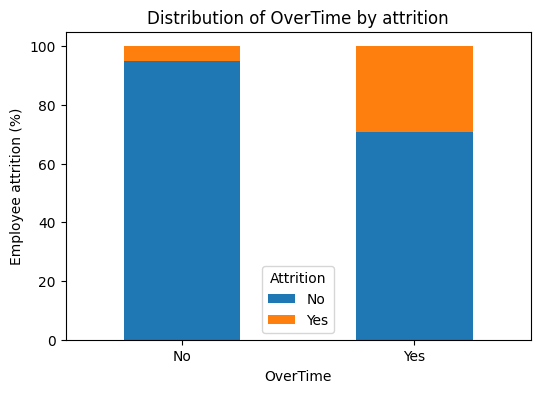

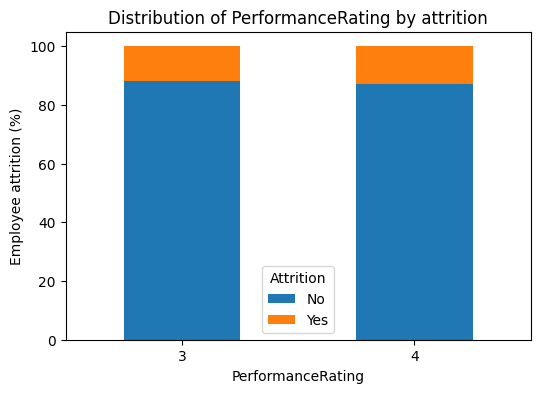

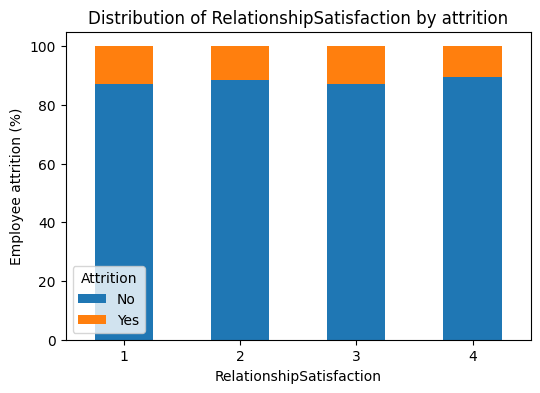

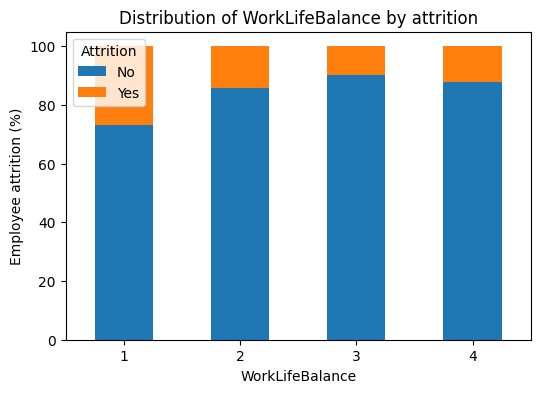

In [107]:
for i in cat_cols:
    if i != 'Attrition':
        fig, ax = plt.subplots(figsize = (6,4))
        crosstab = pd.crosstab(df[i], df['Attrition'], normalize = 'index') * 100
        crosstab.plot(kind = 'bar', stacked = True, ax = ax)
        ax.set_ylabel('Employee attrition (%)')
        ax.tick_params(axis = 'x', rotation = 0)
        ax.set_title(f'Distribution of {i} by attrition')
        
        plt.show()

  Employee attrition is affected by travel frequency, employees' satisfaction to the working environment, involvement to job, satifaction to the job, job level, marital status, whether work overtime, work-life balance.

In [108]:
df.groupby(['Attrition'])[num_cols].mean().T

Attrition,No,Yes
Age,37.670278,30.899497
DailyRate,808.499661,741.613065
DistanceFromHome,8.905890,11.567839
HourlyRate,65.739336,63.472362
MonthlyIncome,6852.301963,4024.246231
MonthlyRate,14167.187542,15176.427136
NumCompaniesWorked,2.646581,2.778894
PercentSalaryHike,15.192959,15.226131
Shift,0.855789,0.437186
TotalWorkingYears,12.012187,6.341709


* The younger an employee is, the more likely he/she tends to quit.
* On average, those who stay earns 70% more compared to those who quit.
* Among those who quit, their average working year, retention at current company and current role, retention working under the same manager are about half of those who stay.

**Data preprocessing**

One of the observations from EDA is that the scales of independent variables are quite different. Without preprocessing, the machine learning model performance will be negatively impacted as the model will assign heavier weight on the independent variables with larger magnitude and lighter weight on those with smaller magnitude although it is not necessarily the case.

We then need to standardize the independent variables by using feature scaling (scaling data to give every transformed variable a comparable scale).

In [109]:
#create dummy variables for some categorical variables
dummy_vars = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']

overtime = {'Yes': 1, 'No': 0}
attrition = {'Yes': 1, 'No': 0}

df = pd.get_dummies(data = df, columns =dummy_vars, drop_first= True)
df['OverTime'] = df.OverTime.map(overtime)
df['Attrition'] = df.Attrition.map(attrition)

In [110]:
#separate target variable (Attrition) and independent variables
y = df['Attrition']
X = df.drop('Attrition', axis = 1)

In [111]:
sc = StandardScaler()

X_scaled = sc.fit_transform(X)

X_scaled = pd.DataFrame(X_scaled, columns = X.columns)


In [112]:
#split the training and test data following 70/30 role and stratify the imbalanced dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 42, stratify = y)

In [113]:
#check the size of training and test datasets
print('Training data set for independent variables: ' + str(X_train.shape))
print('Training data set for target variable: ' + str(y_train.shape))
print('Test data set for independent variables: ' + str(X_test.shape))
print('Test data set for target variable: ' + str(y_test.shape))

Training data set for independent variables: (1173, 40)
Training data set for target variable: (1173,)
Test data set for independent variables: (503, 40)
Test data set for target variable: (503,)


**Model building**

We will use logistic, K-nearest neighbor (K-NN), Linear discriminant analysis (LDA) and quadratic discriminant analysis (QDA) to build machine learning models, and evaluate their performances using a confusion matrix. 

In our employee attrition case, we wish to correctly predict those are about to attrite and provide intervention to stop the loss of talented. We also want to keep the prediction error low. That is, the number of wrongly predicting those would stay are actually leaving should be low. Thus, the metric should be focused on is *false negative* (the left bottom side of the confusion matrix).
The key performance metric will then be *recall*, which calculates the number of true positives divided by the sum of true positives and false negative. The higher false negative number, the lower recall. 

The champion model will be the one with the lowest false negative (those would attrite but wrongly predicted to not be attriting) number and highest recall score.

In [114]:
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    
    plt.figure(figsize =  (6,4))

    sns.heatmap(cm, annot = True, fmt= '.2f', xticklabels = ['Not attrite', 'Attrite'], yticklabels = ['Not attrite', 'Attrite'])

    plt.ylabel('Actual')
    plt.xlabel('Predicted')

    plt.show()

**logistic regression**

In [115]:
#fit the model
log = LogisticRegression()
log.fit(X_train, y_train)

LogisticRegression()

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1034
           1       0.84      0.70      0.76       139

    accuracy                           0.95      1173
   macro avg       0.90      0.84      0.87      1173
weighted avg       0.95      0.95      0.95      1173



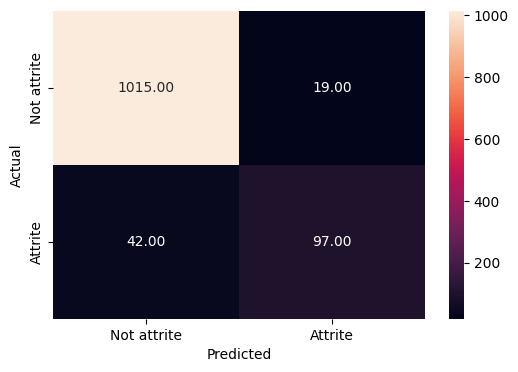

In [116]:
#check the model performance on training data
y_train_pred = log.predict(X_train)

metrics_score(y_train, y_train_pred)

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       443
           1       0.76      0.58      0.66        60

    accuracy                           0.93       503
   macro avg       0.85      0.78      0.81       503
weighted avg       0.92      0.93      0.92       503



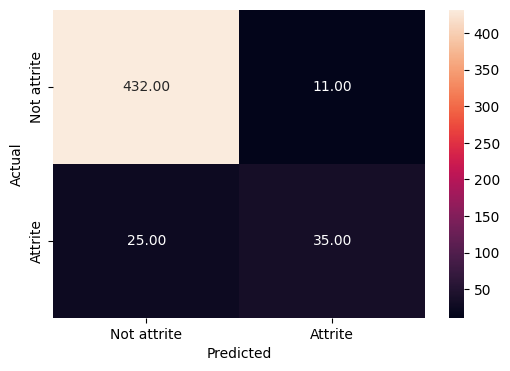

In [117]:
#check the performance on test dataset
y_test_pred = log.predict(X_test)
metrics_score(y_test, y_test_pred)

The model has a recall score of 70% on the training data and only 58% on the test data. So this logistic model doesn't perform well based on our need.

We also check those independent variables that lead to employee attrition.

In [118]:
#calculate the odds
odds = np.exp(log.coef_[0])
pd.DataFrame(odds, X_train.columns, columns = ['odds']).sort_values(by = 'odds', ascending=False)

,odds
OverTime,5.940899
YearsSinceLastPromotion,2.612036
MaritalStatus_Single,2.470349
DistanceFromHome,2.084586
NumCompaniesWorked,1.844747
BusinessTravel_Travel_Frequently,1.706070
JobRole_Nurse,1.506721
JobRole_Other,1.475051
MaritalStatus_Married,1.306062
Gender_Male,1.170840


OverTime, YearsSinceLastPromotion, MaritalStatus are among the popular factors lead to employee attrition:
* Employees who work overtime are about 6 times more likely to quit compared to those who don't work overtime, having other factors unchanged.
* For each additional year since an employee's last promotion, the odds of leaving the company increases by 2.61 times, having other factors unchanged.
* Employees who are single are 2.41 times more likely to quit compared to those who are married, divorce or being in a relationship, assuming other factors unchanged.

Next, we look at the precision-recall curve of the logistic model

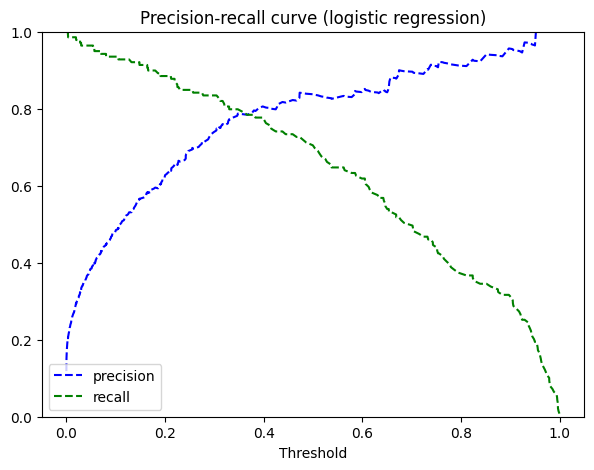

In [120]:
y_scores_log = log.predict_proba(X_train) # predict_proba gives the probability of each observation belonging to each class
precisions_log, recalls_log, thresholds_log = precision_recall_curve(y_train, y_scores_log[:, 1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize = (7,5))

plt.plot(thresholds_log, precisions_log[:-1], 'b--', label = 'precision')
plt.plot(thresholds_log, recalls_log[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc = 'lower left')
plt.ylim([0, 1])
plt.title('Precision-recall curve (logistic regression)')


plt.show()

The precision and recall curves are balanced at the threshold of about 0.38. We can use this threshold and check the model performance on training and test data.

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1034
           1       0.80      0.78      0.79       139

    accuracy                           0.95      1173
   macro avg       0.88      0.88      0.88      1173
weighted avg       0.95      0.95      0.95      1173



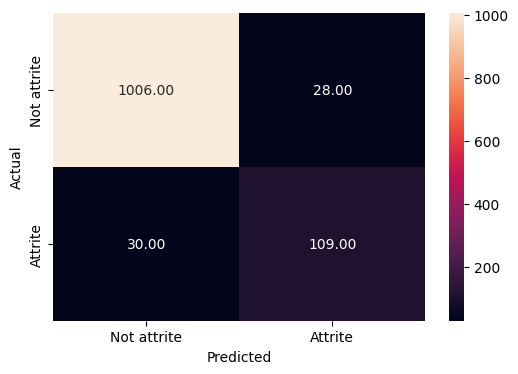

In [121]:
threshold = 0.38
y_train_pred = log.predict_proba(X_train)

metrics_score(y_train, y_train_pred[:, 1] > threshold)

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       443
           1       0.71      0.70      0.71        60

    accuracy                           0.93       503
   macro avg       0.84      0.83      0.83       503
weighted avg       0.93      0.93      0.93       503



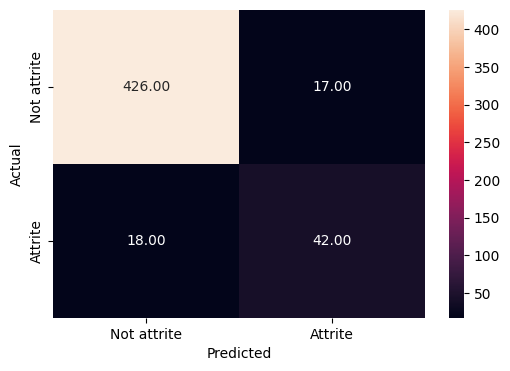

In [122]:
threshold = 0.38
y_test_pred = log.predict_proba(X_test)

metrics_score(y_test, y_test_pred[:, 1] > threshold)

* By adjusting the threshold value, the model yields better recall scores on both training (0.7 to 0.78) and test data (0.58 to 0.7).
* The performance scores are similar in both training and test data, meaning the model doesn't overfit the training data and is a generalized.
* However, the recall score from the logistic model is not ideal. Thus, we should explore other alternatives. 
  

**K-nearest neighbors (KNN)**

In [128]:
#identify the optimal value for k
knn = KNeighborsClassifier()

train_error = []
test_error = []

knn_many_split = {}

error_df_knn = pd.DataFrame()

features = X.columns

for k in range(1, 15):
    train_error = []

    test_error = []

    lista = []

    knn = KNeighborsClassifier(n_neighbors = k)

    for i in range(30):
        X_train_new, X_val, y_train_new, y_val = train_test_split(X_train, y_train, test_size = 0.20) #reserve 20% of training data as validation data

        X_train_new = np.array(X_train_new)
        y_train_new = np.array(y_train_new)
        X_val = np.array(X_val)
        y_val = np.array(y_val)

        # Fitting K-NN on the training data
        knn.fit(X_train_new, y_train_new)

        # Calculating error on the training data and the validation data
        train_error.append(1 - knn.score(X_train_new, y_train_new))
        test_error.append(1 - knn.score(X_val, y_val))

    lista.append(sum(train_error)/len(train_error))
    lista.append(sum(test_error)/len(test_error))

    knn_many_split[k] = lista

knn_many_split

Python(39170) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


{1: [0.0020255863539445826, 0.12241134751773049],
 2: [0.07562189054726368, 0.11943262411347516],
 3: [0.0671641791044776, 0.11404255319148936],
 4: [0.09442075337597729, 0.11390070921985819],
 5: [0.08958777540867094, 0.1095035460992908],
 6: [0.1023809523809524, 0.11049645390070924],
 7: [0.09676616915422884, 0.11219858156028371],
 8: [0.10493958777540867, 0.11361702127659573],
 9: [0.10174129353233832, 0.11673758865248227],
 10: [0.10707178393745559, 0.11957446808510643],
 11: [0.10657427149964466, 0.11063829787234039],
 12: [0.10991471215351813, 0.11106382978723404],
 13: [0.10742714996446344, 0.10539007092198581],
 14: [0.11119402985074626, 0.110354609929078]}

In [130]:
#plot different values of K and errors
ktrain = []
vtrain = []

for k, v in knn_many_split.items():
    ktrain.append(k)
    vtrain.append(knn_many_split[k][0])

ktest = []
vtest = []

for k, v in knn_many_split.items():
    ktest.append(k)
    vtest.append(knn_many_split[k][1])

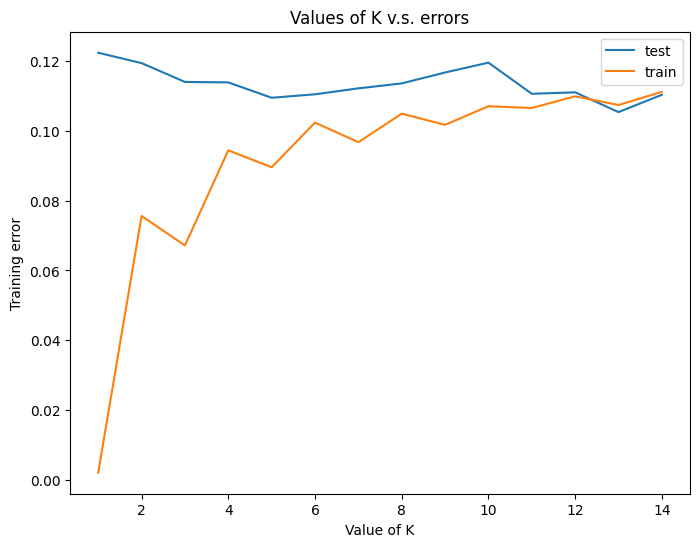

In [133]:
#plotting
plt.figure(figsize=(8,6))

plt.plot(ktest, vtest, label = 'test')
plt.plot(ktrain, vtrain, label = 'train')

plt.title('Values of K v.s. errors')
plt.xlabel('Value of K')
plt.ylabel('Training error')
plt.legend()

plt.show()

The training error on the test data decreses at k = 5 and somehow stablizes after. Similarly, the training error on the training data reaches the plateau at k = 5. In this case, we can start building the K-NN model with k = 5.

In [148]:
knn = KNeighborsClassifier(n_neighbors = 5)

In [149]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1034
           1       0.89      0.30      0.45       139

    accuracy                           0.91      1173
   macro avg       0.90      0.65      0.70      1173
weighted avg       0.91      0.91      0.89      1173



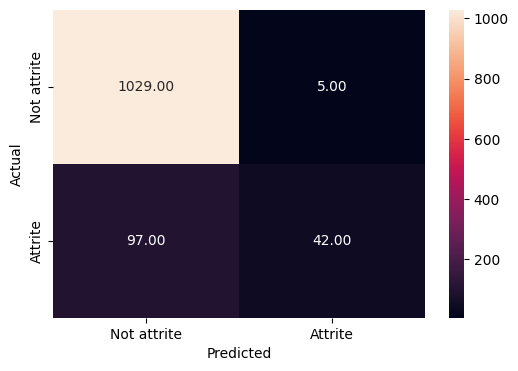

In [150]:
#check performance on training data
y_train_pred_knn = knn.predict(X_train.values)
metrics_score(y_train, y_train_pred_knn)

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       443
           1       0.61      0.18      0.28        60

    accuracy                           0.89       503
   macro avg       0.76      0.58      0.61       503
weighted avg       0.86      0.89      0.86       503



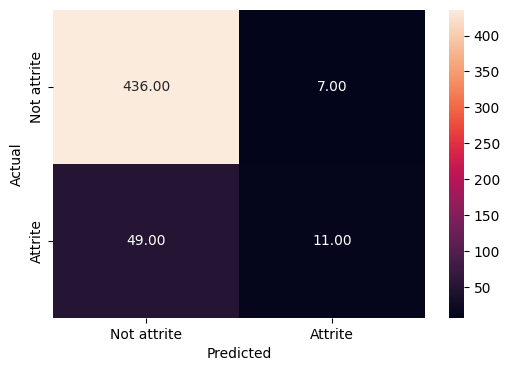

In [151]:
#check performance on test data
y_test_pred_knn = knn.predict(X_test.values)
metrics_score(y_test, y_test_pred_knn)

The 5-nearest-neighbor model yields a recall score of 0.3 on training data and 0.18 on test data, which is not ideal. 

We will tune the hyperparameters of the models to see if it will improve the model performance.


Hyperparameters to be tuned: 
**n_neighbors**
* Number of neighbors to use.
  
**weights={'uniform', 'distance'}**
  * uniform : uniform weights. All points in each neighborhood are weighted equally.
  * distance : weight points by the inverse of their distance. In this case, the closest neighbors of a query point will have a greater influence than neighbors that are further away.
  
**p**
  * When p = 1, this is equivalent to using Manhattan_distance (L1), and Euclidean_distance (L2) is used for p = 2.

In [155]:
#gridsearchCV
knn_params = {'n_neighbors': np.arange(3,15), 'weights': ['uniform', 'distance'], 'p': [1,2]}

grid_knn = GridSearchCV(estimator=knn, param_grid= knn_params, scoring = 'recall', cv = 10) # 10-fold cross-validation

knn_tuned = grid_knn.fit(X_train, y_train)

knn_tuned_params = knn_tuned.best_estimator_
print('tuned KNN hyperparameters: ')
print(knn_tuned_params)


tuned KNN hyperparameters: 
KNeighborsClassifier(n_neighbors=3, p=1, weights='distance')


The result of the GridSearch cross-validation shows that, to obtain the optimal outcome, we need to set K to be 3, use Manhattan distance and weight points by the inverse of their distance. Taking it into account, we fit the KNN model using training and test data again.

In [156]:
knn_tuned_params.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3, p=1, weights='distance')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1034
           1       1.00      0.98      0.99       139

    accuracy                           1.00      1173
   macro avg       1.00      0.99      0.99      1173
weighted avg       1.00      1.00      1.00      1173



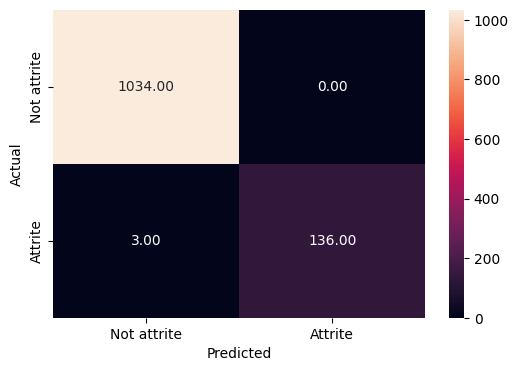

In [159]:
#check performance on training data
y_train_pred_knn_tuned = knn_tuned_params.predict(X_train)
metrics_score(y_train, y_train_pred_knn_tuned)

              precision    recall  f1-score   support

           0       0.92      0.97      0.95       443
           1       0.65      0.40      0.49        60

    accuracy                           0.90       503
   macro avg       0.79      0.69      0.72       503
weighted avg       0.89      0.90      0.89       503



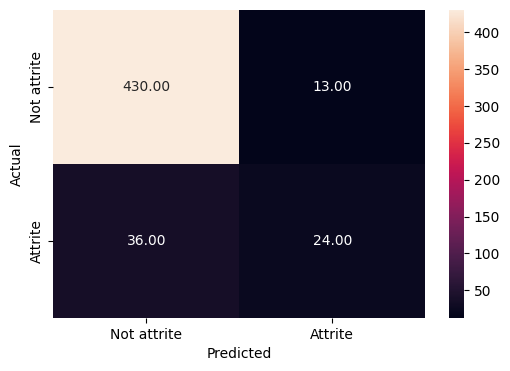

In [160]:
#check model performance on test data
y_test_pred_knn_tuned = knn_tuned_params.predict(X_test)
metrics_score(y_test, y_test_pred_knn_tuned)

Two problems in the tuned K-NN model:
* The tuned K-NN model performes perfectly on detecting those are not attriting but works poorly on those actually are attriting. This case doesn't satisfy our business need.
* The tuned K-NN model overfits the training data but can't not be generalized.

**Linear discriminant analysis (LDA)**

In [161]:
#fit the LDA model
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1034
           1       0.77      0.57      0.66       139

    accuracy                           0.93      1173
   macro avg       0.86      0.77      0.81      1173
weighted avg       0.92      0.93      0.92      1173



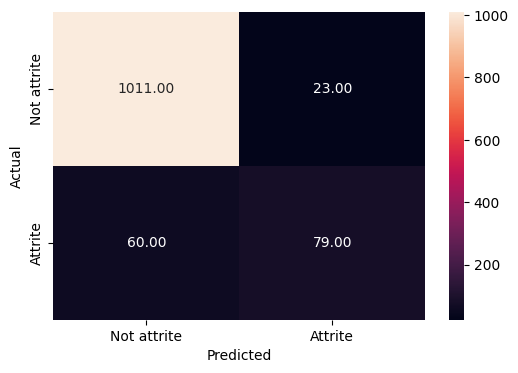

In [162]:
#check the model performance on training data
y_train_pred_lda = lda.predict(X_train)

metrics_score(y_train, y_train_pred_lda)

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       443
           1       0.74      0.47      0.57        60

    accuracy                           0.92       503
   macro avg       0.83      0.72      0.76       503
weighted avg       0.91      0.92      0.91       503



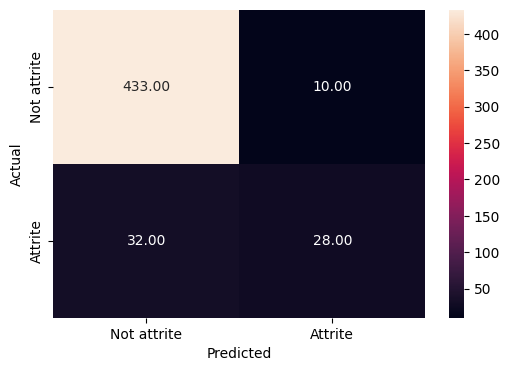

In [163]:
#check the model performance on test data
y_test_pred_lda = lda.predict(X_test)
metrics_score(y_test, y_test_pred_lda)

The model's ability to detect those won't attrite is pretty high with a recall score of 0.98 on both training and test data. But it seems to overfit the training data.

Let's plot the precision-recall curve and find the threshold values.

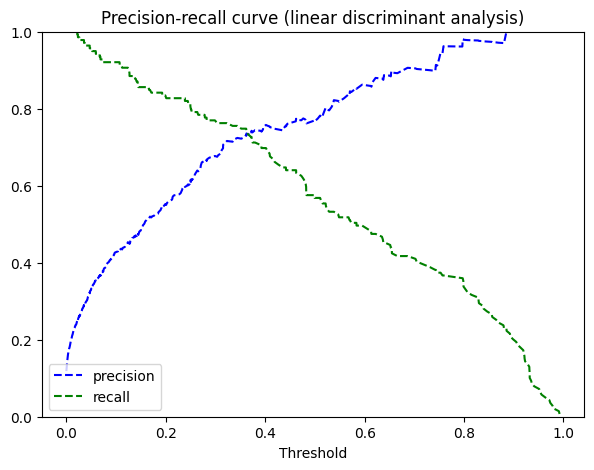

In [164]:
y_scores_lda = lda.predict_proba(X_train)

precisions_lda, recalls_lda, thresholds_lda = precision_recall_curve(y_train, y_scores_lda[:, 1])

# Plot values of precisions, recalls, and thresholds
plt.figure(figsize = (7,5))

plt.plot(thresholds_lda, precisions_lda[:-1], 'b--', label = 'precision')
plt.plot(thresholds_lda, recalls_lda[:-1], 'g--', label = 'recall')
plt.xlabel('Threshold')
plt.legend(loc = 'lower left')
plt.ylim([0, 1])
plt.title('Precision-recall curve (linear discriminant analysis)')



plt.show()

There's a equilibrium for precision and recall where threshold is about 0.38. Let's evaluate model performance using this threshold value.

In [167]:
threshold_lda = 0.38

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1034
           1       0.74      0.71      0.72       139

    accuracy                           0.94      1173
   macro avg       0.85      0.84      0.84      1173
weighted avg       0.93      0.94      0.94      1173



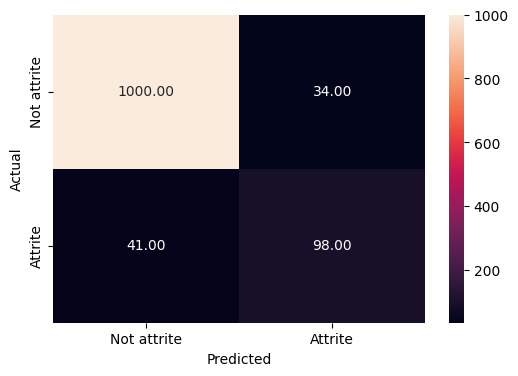

In [168]:
#on training data
y_train_pred_lda = lda.predict_proba(X_train)
metrics_score(y_train, y_train_pred_lda[:,1] > threshold_lda)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       443
           1       0.67      0.58      0.63        60

    accuracy                           0.92       503
   macro avg       0.81      0.77      0.79       503
weighted avg       0.91      0.92      0.91       503



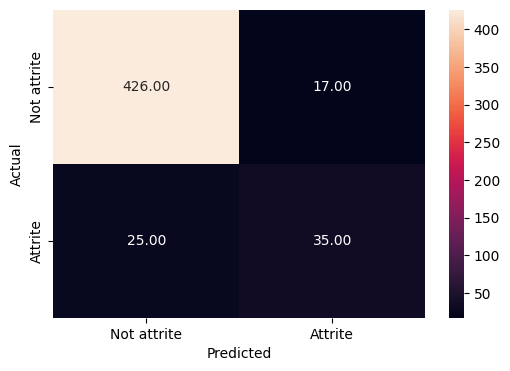

In [169]:
#on test data
y_test_pred_lda = lda.predict_proba(X_test)
metrics_score(y_test, y_test_pred_lda[:,1] > threshold_lda)

With optimal threshold, the model performs better in identify those have a possibility to attrite. But the recall score drops from 0.71 on training data to 0.58 on test data, meaning the overfitting problem still exists. Overall, this LDA model performs relatively well.

In [170]:
#check variable importance
cols = X.columns

coef_lda = lda.coef_

pd.DataFrame(coef_lda, columns = cols).T.sort_values(by = 0, ascending=False)

,0
OverTime,1.614843
MaritalStatus_Single,0.805220
DistanceFromHome,0.456512
NumCompaniesWorked,0.394619
YearsSinceLastPromotion,0.378159
BusinessTravel_Travel_Frequently,0.192102
MaritalStatus_Married,0.142104
YearsAtCompany,0.120008
MonthlyRate,0.095086
MonthlyIncome,0.056720


* OverTime, MaritalStatus_Single, DistanceFromHome, NumCompaniesWorked and YearsSinceLastPromotion are among those have a positive impact on employee attrition.
* EducationField_Life Sciences, YearsInCurrentRole, JobRole_Therapist, EnvironmentSatisfaction, JobInvolvement, EducationField_Medical and Age are among those have a negative impact on employee attrition.


**Quadratic discriminant analysis (QDA)**

Quadratic discriminant analysis (QDA) uses a quadratic/non-linear curve that best seperates the data into two classes. Let's explore whether a QDA model will yield a better result. 

In [172]:
#fit the model
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)

QuadraticDiscriminantAnalysis()

              precision    recall  f1-score   support

           0       1.00      0.17      0.29      1034
           1       0.14      1.00      0.24       139

    accuracy                           0.27      1173
   macro avg       0.57      0.58      0.26      1173
weighted avg       0.90      0.27      0.28      1173



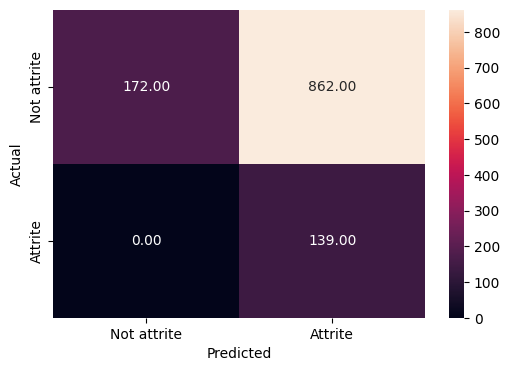

In [174]:
#check the model performance on training data
y_train_pred_qda = qda.predict(X_train)
metrics_score(y_train, y_train_pred_qda)

              precision    recall  f1-score   support

           0       0.99      0.17      0.29       443
           1       0.14      0.98      0.24        60

    accuracy                           0.27       503
   macro avg       0.56      0.58      0.27       503
weighted avg       0.89      0.27      0.29       503



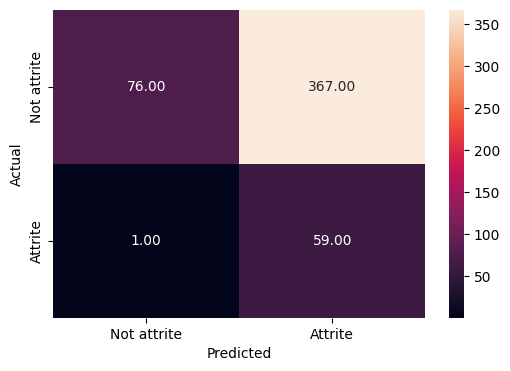

In [175]:
#check the model performance on training data
y_test_pred_qda = qda.predict(X_test)
metrics_score(y_test, y_test_pred_qda)

The QDA model yields a very high recall score on class 1 (attrition), but works poorly for identifying class 0 (no attrition). The model also has a high number of false positive (upper right), meaning the model will more likely to determine those who are not attriting have intention to quit. Overall, this QDA model is not an ideal one and can't meet the business need.